# **Project Name**    - **Amazon Delivery Time Prediction**



##### **Project Type**    - EDA/Regression/MLFlow/Streamlit


##### **Contribution**    - Individual


# **Project Summary -**

This project aims to develop a robust machine learning model to predict the delivery time for e-commerce orders. The dataset contains a variety of features related to orders, delivery agents, and environmental conditions, such as agent's age and rating, store and drop-off locations, order date and time, weather conditions, and traffic density.

The project follows a structured workflow:

**Data Exploration and Preprocessing:** The initial phase involves a thorough exploratory data analysis (EDA) to understand the data's characteristics, identify patterns, and uncover relationships between variables. This is followed by data wrangling, where we handle missing values, correct data types, and encode categorical variables.

**Feature Engineering:** New, meaningful features are created to enhance the model's predictive power. A key feature engineered is the haversine distance between the store and the delivery location, calculated from latitude and longitude data. Time-based features are also extracted from timestamps.

**Model Training and Evaluation:** Several regression algorithms, including Linear Regression, Random Forest, and Gradient Boosting, are trained on the preprocessed data. Their performance is rigorously evaluated using metrics like R-squared (R
2
 ), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

**Deployment:** The best-performing model is saved and will be integrated into a user-friendly web application built with Streamlit, allowing for real-time delivery time predictions based on user inputs.

**The ultimate goal is to provide a tool that can help optimize logistics, improve customer satisfaction by setting accurate delivery expectations, and enhance operational efficiency.**

**Dataset → Preprocessing → Feature Engineering → EDA → Model Training & MLflow Tracking → Evaluation → Deployment in Streamlit → End Users.**

# **GitHub Link and Stream lit app link-**

https://github.com/PriyaS1111/Amazon-Delivery-Time-Prediction

https://jeri-cytolytic-sha.ngrok-free.dev/

# **Problem Statement**


In the competitive e-commerce landscape, **providing accurate delivery time estimates is crucial for customer satisfaction** and operational efficiency. Inaccurate predictions can lead to customer frustration, increased support costs, and logistical challenges.

The objective of this project is to **leverage historical delivery data to build a regression model that accurately predicts the time taken for a delivery, from order placement to arrival.** The model should consider various factors, including delivery agent details, traffic conditions, weather, order specifics, and geographical distance. The final output will be a reliable prediction system that can be used to set realistic delivery expectations for customers and aid in logistics planning

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

Here, we import all the necessary libraries for data manipulation, visualization, and modeling.

In [ ]:
#Install gdown & Import Libraries
!pip install gdown
import gdown # For downloading data from googledrive
import os # To check files in the directory

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2

# Scikit-learn for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:

#Download the Files from Google Drive
gdown.download("https://drive.google.com/uc?id=1LSuZakpqZpDrMWNeQodpecezreubwqrn", "amazon_delivery.csv", quiet=False)




In [ ]:
#verify that files are downloaded
import os
print(os.listdir())  # Lists all files in current directory

We'll load the amazon_delivery.csv dataset into a pandas DataFrame.

In [ ]:
# Load Dataset
df = pd.read_csv('amazon_delivery.csv')

### Dataset First View

Let's look at the first 5 rows to get a feel for the data.

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

This shows us the dimensions of our dataset.

In [ ]:
# Dataset Rows & Columns count
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

### Dataset Information

df.info() gives a concise summary of the DataFrame, including the data type of each column and the number of non-null values.

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

We check for any duplicate rows in the dataset.

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"There are {duplicate_count} duplicate rows in the dataset.")

#### Missing Values/Null Values

Let's check for any missing values in each column.

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset contains 43,739 rows and 16 columns, representing individual delivery orders. From the initial inspection, we know the following:

Data Types: The columns consist of a mix of numerical (int64, float64) and categorical (object) data types. Columns like Order_Date, Order_Time, and Pickup_Time are currently stored as object types and will need to be converted to a proper datetime format for time-based analysis.

Duplicates: The dataset is clean with zero duplicate rows, which ensures the integrity of our analysis.

Missing Values: There are a small number of missing values in two columns: Agent_Rating (54 missing) and Weather (91 missing). These will need to be handled appropriately during the data wrangling phase before we can proceed with analysis and modeling.

Content: The dataset provides comprehensive information for each delivery, covering agent details, location coordinates, timestamps, and external factors like weather and traffic, making it suitable for predicting delivery times.

## ***2. Understanding Your Variables***

Here are the names of all the columns in our dataset.

In [ ]:
# Dataset Columns
print(df.columns)

This gives a statistical summary for both numerical and categorical columns.

In [ ]:
# Dataset Describe
df.describe(include='all')



Based on the statistical summary (df.describe()), we can observe the following:

Agent_Age: The delivery agents' ages range from 15 to 50 years, with an average age of approximately 29.5 years.

Agent_Rating: Ratings vary from 1.0 to 6.0 (the 6.0 might be a data entry error, as ratings are typically out of 5), with an average rating of about 4.63. This suggests that most agents are rated quite highly.

Delivery_Time: The delivery times range from a minimum of 10 minutes to a maximum of 270 minutes (4.5 hours), with the average delivery taking about 125 minutes (just over 2 hours).

Categorical Data:

The most common weather condition is "Fog".

The most frequent traffic condition is "Low".

The primary vehicle used is the "motorcycle".

Most deliveries occur in "Metropolitian" areas.

The most frequent product category is "Electronics".

### Variables Description

Order_ID: Unique identifier for each order.

Agent_Age: Age of the delivery agent.

Agent_Rating: Rating of the delivery agent (out of 5).

Store_Latitude/Longitude: Geographic coordinates of the store.

Drop_Latitude/Longitude: Geographic coordinates of the delivery address.

Order_Date/Order_Time: Date and time the order was placed.

Pickup_Time: Time the agent picked up the order.

Weather: Weather conditions at the time of delivery.

Traffic: Traffic conditions at the time of delivery.

Vehicle: Vehicle used for the delivery.

Area: Type of delivery area (Urban/Metropolitan).

Delivery_Time: The target variable; total time taken for delivery in minutes.

Category: The category of the product being delivered.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"Number of unique values in {col}: {df[col].nunique()}")

The unique value counts reveal the diversity within each feature:

There are 43,739 unique Order_IDs, confirming that each row represents a distinct order.

There are 6 unique weather conditions and 5 traffic conditions, giving us a good variety of environmental factors to analyze.

The data covers 44 different dates.

There are 16 unique product categories. This level of detail will be useful for analyzing if certain product types take longer to deliver.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Make a copy of the original dataframe to work on
df_wrangled = df.copy()

In [ ]:
# --- 1. Handling Missing Values ---

# For 'Agent_Rating', we will fill the missing values with the mean (average) rating.
# This is a reasonable approach as the number of missing values is small.
agent_rating_mean = df_wrangled['Agent_Rating'].mean()
df_wrangled['Agent_Rating'].fillna(agent_rating_mean, inplace=True)

In [ ]:
# For 'Weather', we will fill the missing values with the mode (most frequent value).
# This is suitable for categorical data.
weather_mode = df_wrangled['Weather'].mode()[0]
df_wrangled['Weather'].fillna(weather_mode, inplace=True)

In [ ]:
print("--- Missing values check after handling ---")

In [ ]:

print(f"Missing Agent_Rating: {df_wrangled['Agent_Rating'].isnull().sum()}")

print(f"Missing Weather: {df_wrangled['Weather'].isnull().sum()}")
print("\n")

In [ ]:
# --- 2. Stripping Whitespace from Text Columns ---

# Get a list of all columns with object (text) data type
object_cols = df_wrangled.select_dtypes(include=['object']).columns

# Strip whitespace from all text columns to prevent matching errors
for col in object_cols:
    df_wrangled[col] = df_wrangled[col].str.strip()

print("--- Whitespace stripped from text columns ---")

In [ ]:

# --- 3. Correcting Data Types ---

# Combine and convert to datetime, coercing errors to NaT (Not a Time)
df_wrangled['Order_DateTime'] = pd.to_datetime(df_wrangled['Order_Date'] + ' ' + df_wrangled['Order_Time'], errors='coerce')
df_wrangled['Pickup_DateTime'] = pd.to_datetime(df_wrangled['Order_Date'] + ' ' + df_wrangled['Pickup_Time'], errors='coerce')

# Check if any NaT values were created
nat_count = df_wrangled[['Order_DateTime', 'Pickup_DateTime']].isnull().sum().sum()
if nat_count > 0:
    print(f"\nFound and removed {nat_count} rows with invalid time entries.")
    # Remove rows where the conversion resulted in a null value
    df_wrangled.dropna(subset=['Order_DateTime', 'Pickup_DateTime'], inplace=True)


In [ ]:
# --- 3. Display the cleaned data's information ---
print("\n--- Data types after conversion ---")
df_wrangled.info()

In [ ]:
# Display the first few rows to see the new datetime columns
print("\n--- First 5 rows of wrangled data ---")
df_wrangled.head()

### What all manipulations have you done and insights you found?

I performed the following data manipulations to prepare the dataset for analysis:

**Handled Missing Values:**

The missing values in Agent_Rating and Weather were successfully imputed using their mean and mode, respectively. The output confirms this, showing Missing Agent_Rating: 0 and Missing Weather: 0.

**Cleaned Text Data:**

A crucial cleaning step was to strip all leading/trailing whitespace from every text column. The insight here is that hidden spaces (e.g., "Jam " vs. "Jam") are a common source of errors in data filtering and analysis. This makes our data more consistent and reliable.



**Corrected Data Types and Handled Corrupted Time Data:**

The original Order_Date, Order_Time, and Pickup_Time columns were combined to create two new, usable datetime columns: Order_DateTime and Pickup_DateTime.

During this conversion, the code correctly identified and handled an important data quality issue. The output Found and removed 91 rows with invalid time entries is a key insight. It tells us that a small portion of the dataset had corrupted time information (likely text "NaN" values instead of actual times), which would have caused errors in any time-based analysis.

To fix this, I used the errors='coerce' parameter during the datetime conversion. This robust method automatically transforms any invalid time entries into null values (NaT).

The few rows containing these corrupted NaT values were then removed from the dataset to ensure data integrity.

By using a robust conversion method (errors='coerce') and then dropping these invalid rows, we have ensured the integrity and reliability of our time-series data.

**Insight Found**: The most critical insight from the wrangling process was the discovery of 91 rows with corrupted time data. Removing them was essential for accuracy. The dataset is now clean and slightly smaller, with 43,648 valid entries, making it a high-quality foundation for visualization and modeling.

We are now ready to proceed to Section 4: Data Visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####  **Chart -1: Distribution of Delivery Time (Target Variable)**


In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 6))
sns.histplot(df_wrangled['Delivery_Time'], kde=True, bins=30)
plt.title('Distribution of Delivery Times', fontsize=16)
plt.xlabel('Delivery Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df_wrangled['Delivery_Time'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df_wrangled['Delivery_Time'].mean():.2f}")
plt.axvline(df_wrangled['Delivery_Time'].median(), color='green', linestyle='-', linewidth=2, label=f"Median: {df_wrangled['Delivery_Time'].median():.2f}")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram with a Kernel Density Estimate (KDE) because it is the best way to visualize the distribution of a single continuous variable. It clearly shows the central tendency, spread, and shape (skewness) of the Delivery_Time, which is our target variable. Adding lines for the mean and median helps to quickly identify the distribution's skewness.

##### 2. What is/are the insight(s) found from the chart?

From the Distribution of Delivery Times chart, we can derive the following key insights:

✅ Primary Insights:

Average Delivery Time is ~125 minutes:

Both mean (124.91) and median (125.00) are nearly equal, indicating that delivery times are evenly distributed with minimal skewness or outliers.

Most Deliveries Fall Between 100–150 Minutes:

The peak (mode) lies in this range, showing where operations are most efficient or concentrated.

Slight Right Skew:

A few deliveries take significantly longer (up to ~270 minutes), suggesting potential delays or inefficiencies in some cases.

No Major Outliers or Failures:

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Yes. Understanding the typical delivery time and the presence of outliers is crucial. The business can set realistic delivery expectations for customers based on the median time (~125 minutes). This accuracy helps build customer trust.

Insight Leading to Negative Growth: The long tail of the distribution (deliveries taking 200+ minutes) represents significant service failures. If the root causes of these outliers (e.g., poor routing, agent issues, specific location problems) are not investigated and fixed, they will lead to high customer dissatisfaction. Dissatisfied customers are likely to leave negative reviews and switch to competitors, directly causing customer churn and hindering growth.

#### **Chart - 2: Frequency of Deliveries by Traffic Conditions**

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
# Get the order of traffic conditions by frequency
order = df_wrangled['Traffic'].value_counts().index
sns.countplot(y='Traffic', data=df_wrangled, order=order, palette='viridis')
plt.title('Number of Deliveries by Traffic Condition', fontsize=16)
plt.xlabel('Number of Deliveries', fontsize=12)
plt.ylabel('Traffic Condition', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart (specifically a countplot) is ideal for visualizing the frequency distribution of a categorical variable. It allows us to quickly see how many deliveries occurred under each traffic condition, making it easy to compare their prevalence in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the majority of deliveries in this dataset occurred in "Low" traffic conditions, followed by "High" and "Medium". Deliveries during a "Jam" are the least frequent. This is important context for our model; it will have more data to learn from for low-traffic scenarios.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Yes. Knowing that most deliveries occur in "Low" traffic can help validate scheduling strategies. The business can use this data to build robust plans for less frequent but high-impact scenarios like traffic jams, ensuring the model's predictions are reliable under all conditions.

Insight Leading to Negative Growth: The relatively low volume of data for "Jam" conditions is a potential risk. It means our predictive model may not be as accurate in these scenarios. If the business expands into a city with notoriously bad traffic, relying on a model undertrained on "Jam" data would lead to systematically inaccurate (overly optimistic) ETAs. This would create a poor customer experience in the new market, damaging the company's reputation and potentially causing the expansion to fail, leading to negative growth.

#### **Chart - 3: Delivery Time vs. Agent Rating**

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Agent_Rating', y='Delivery_Time', data=df_wrangled, alpha=0.5)
plt.title('Delivery Time vs. Agent Rating', fontsize=16)
plt.xlabel('Agent Rating', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?


A scatter plot is the standard choice for visualizing the relationship between two continuous variables. It helps us identify patterns, trends, or correlations. Here, we want to see if an agent's rating has any relationship with their delivery performance.

##### 2. What is/are the insight(s) found from the chart?


There does not appear to be a strong, clear linear relationship between Agent_Rating and Delivery_Time. However, we can observe that agents with very low ratings (below 3.5) seem to have a wider variance in delivery times, including some of the longest delays. Agents with higher ratings (4.5+) are more concentrated in the lower delivery time range, but still handle both quick and slow deliveries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Yes. The chart suggests that while a high rating doesn't guarantee a fast delivery, very low-rated agents are linked to performance inconsistency. This allows the business to proactively identify agents with ratings below a certain threshold (e.g., 3.5) for additional training or performance management. Improving the consistency of the lowest-performing agents can significantly uplift the overall service quality.

Insight Leading to Negative Growth: The presence of agents with very low ratings (e.g., below 3.0) who are still active is a direct risk. These agents are demonstrably providing a poor experience, as reflected in both their ratings and their inconsistent delivery times. Continuously assigning orders to these agents is a choice that guarantees a certain percentage of customers will have a bad experience. This can damage brand reputation through negative word-of-mouth and online reviews, directly impacting customer acquisition and retention.

#### **Chart - 4:Delivery Time by Weather Conditions**

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 7))
# Order by median delivery time
order = df_wrangled.groupby('Weather')['Delivery_Time'].median().sort_values().index
sns.boxplot(x='Weather', y='Delivery_Time', data=df_wrangled, order=order, palette='plasma')
plt.title('Delivery Time Distribution by Weather', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

A box plot is perfect for comparing the distribution of a continuous variable (Delivery_Time) across several categories (Weather). It clearly shows the median, interquartile range (IQR), and potential outliers for each weather condition, making it much more informative than a simple bar chart of averages.

##### 2. What is/are the insight(s) found from the chart?

Adverse weather conditions clearly impact delivery times. "Sunny" and "Cloudy" conditions have the lowest median delivery times. In contrast, "Fog", "Stormy", and "Sandstorms" lead to significantly longer and more variable delivery times, as shown by the higher medians and larger box sizes

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Absolutely. This is a highly actionable insight. The business can create a dynamic ETA system that automatically adds a delivery time buffer based on real-time weather conditions. For instance, when the weather is "Stormy," the ETA shown to the customer can be increased by 20-30 minutes. This manages customer expectations effectively, reduces "Where is my order?" calls, and increases satisfaction even when unavoidable delays occur.

Insight Leading to Negative Growth: There are no insights that inherently lead to negative growth; however, ignoring these insights would. If the business fails to account for the clear impact of weather on delivery times, it will systematically fail to meet its ETAs on days with adverse weather. This would lead to a massive spike in customer complaints, overwhelm support staff, and destroy customer trust, potentially causing a significant drop in orders (negative growth) during periods of bad weather.

#### **Chart - 5: Count of Deliveries by Vehicle Type**

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))

# Get the value counts for vehicle types
vehicle_counts = df_wrangled['Vehicle'].value_counts()

# Dynamically create the explode list
# This will only "explode" the first (largest) slice.
num_vehicles = len(vehicle_counts)
explode_list = [0.05] + [0] * (num_vehicles - 1)


vehicle_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), explode=explode_list)
plt.title('Proportion of Vehicle Types Used for Delivery', fontsize=16)
plt.ylabel('') # Hiding the 'Vehicle' label on the y-axis for better aesthetics
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is effective for showing the proportional distribution of a categorical variable when there are a small number of categories. It immediately communicates the share of each vehicle type in the overall delivery operations

##### 2. What is/are the insight(s) found from the chart?

The vast majority of deliveries are carried out using motorcycles (58.5%). Scooters and vans are used much less frequently, and there is a very small "electric scooter" category. This indicates that the delivery fleet is heavily reliant on two-wheelers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: This gives a clear overview of the company's delivery fleet composition. The heavy reliance on motorcycles is likely a cost-effective and efficient strategy for navigating urban traffic. This understanding allows for targeted fleet management, such as optimizing maintenance schedules for the most-used vehicle type.

Insight Leading to Negative Growth: The over-reliance on motorcycles is a significant operational risk that could lead to negative growth. Motorcycles are highly susceptible to adverse weather conditions (like storms or heavy rain). During a prolonged period of bad weather (e.g., a monsoon season), a majority of the delivery fleet could be rendered unsafe or ineffective. This would lead to a system-wide failure to fulfill orders, massive delays, and a potential exodus of customers to competitors with more robust, all-weather fleets (like vans), causing a direct hit to revenue and market share.

#### **Chart - 6: Delivery Time vs. Agent Age**

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Agent_Age', y='Delivery_Time', data=df_wrangled, alpha=0.5, color='orange')
plt.title('Delivery Time vs. Agent Age', fontsize=16)
plt.xlabel('Agent Age', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the best choice to investigate the relationship between two numerical variables, in this case, Agent_Age and our target, Delivery_Time. It helps us visualize any potential correlation, trends, or patterns between them.

##### 2. What is/are the insight(s) found from the chart?

The data appears evenly distributed across agent ages — meaning each age (20 to 39) has a similar number of data points.

There doesn't appear to be a strong trend between agent age and delivery time:

Young agents (20–25) and older agents (35–39) both have delivery times spread across the full range (from very short to very long).

No clear pattern like increasing or decreasing delivery time with age.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: This insight is valuable because it tells the business what not to focus on. It suggests that an agent's age is not a primary driver of slow deliveries. Therefore, the business can avoid making biased decisions (like hiring only within a specific age range) and instead focus on factors that do matter, like training, routing efficiency, and performance metrics.

Insight Leading to Negative Growth: There is no direct insight here that leads to negative growth. However, if the company were to act on a biased assumption that "younger agents are faster" without looking at this data, they could create a discriminatory hiring environment and miss out on reliable, experienced agents, which could negatively impact their operational capacity and brand image.


### **Chart - 7: Delivery Time Distribution by Area**



In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 7))
sns.violinplot(x='Area', y='Delivery_Time', data=df_wrangled, palette='coolwarm')
plt.title('Delivery Time Distribution by Area Type', fontsize=16)
plt.xlabel('Area Type', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a violin plot as a more advanced alternative to the box plot. While a box plot shows summary statistics, a violin plot combines this with a KDE plot, showing the full probability density of the data. This is great for seeing the shape of the distribution and where the concentration of data points lies for each category (Urban vs. Metropolitan).

##### 2. What is/are the insight(s) found from the chart?

The distributions for "Urban" and "Metropolitan" areas are quite similar, but with a key difference. The violin plot for "Metropolitan" is slightly wider and taller, indicating a higher volume of deliveries. The median delivery times are very close, but the "Urban" distribution appears to be slightly more concentrated around its median

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: The insight that delivery times are broadly similar across area types is useful. It suggests that the current logistics network is equally effective in both urban and metropolitan settings. This simplifies the prediction model, as Area may not be as critical a feature as initially thought.

Insight Leading to Negative Growth: No direct negative insight. However, if the company assumed that "Urban" deliveries should be much faster due to lower density and planned resource allocation based on that assumption, they might under-serve their urban customers, leading to dissatisfaction and potential churn in those areas. This data helps prevent such a strategic mistake.

#### **Chart - 8: Number of Deliveries Over Time**

In [ ]:
# Chart - 8 visualization code
# Group by date and count the orders
daily_orders = df_wrangled.groupby(df_wrangled['Order_DateTime'].dt.date).size()

plt.figure(figsize=(15, 7))
daily_orders.plot(kind='line', marker='o', linestyle='-')
plt.title('Total Number of Deliveries Per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is the most effective way to visualize time-series data. It clearly shows trends, seasonality, and anomalies over a continuous period. Here, we are plotting the number of deliveries each day to see if there are any patterns.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a fluctuating but generally consistent volume of daily deliveries. There are noticeable peaks and troughs, suggesting some form of weekly pattern or specific high-volume days. For example, there seems to be a significant spike in activity around the end of March and the beginning of April.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: This is extremely useful for resource planning and demand forecasting. By identifying peak delivery days, the business can schedule more agents and prepare for higher volumes in advance, ensuring smooth operations and maintaining service quality during busy periods.

Insight Leading to Negative Growth: The troughs represent days with significantly lower order volumes. If these dips are unexpected, it could mean operational inefficiency (agents are scheduled but have no work). If the dips are caused by a recurring issue (e.g., a technical problem on a specific day of the week), failing to address it would lead to lost revenue and customer frustration, directly impacting growth.

#### Chart - 9: Average Delivery Time by Day of the Week

In [ ]:
# Chart - 9 visualization code
# Extract day of the week (Monday=0, Sunday=6)
df_wrangled['day_of_week'] = df_wrangled['Order_DateTime'].dt.day_name()

# Calculate average delivery time per day
avg_time_by_day = df_wrangled.groupby('day_of_week')['Delivery_Time'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_time_by_day.plot(kind='bar', color=sns.color_palette('magma', 7))
plt.title('Average Delivery Time by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Delivery Time (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the best way to compare a numerical value (average delivery time) across different categories (days of the week). It provides a clear and straightforward comparison, making it easy to spot which days are faster or slower on average.

##### 2. What is/are the insight(s) found from the chart?

Wednesday has the highest average delivery time.

Thursday has the lowest, suggesting more efficient deliveries or lower demand.

There's a gradual increase from Thursday to Wednesday.

Weekends (Saturday, Sunday) have moderately high delivery times — possibly due to increased orders or fewer available delivery agents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business impact:

Operational Optimization:

The business can identify workload imbalances.

Helps in scheduling more delivery agents or resources on high-load days (e.g., Wednesday).

Improved Customer Experience:

If delivery delays are reduced on peak days, customer satisfaction improves, reducing churn and increasing repeat orders.

Informed Marketing Decisions:

On slower or more efficient days (like Thursday), businesses can run promotional offers to shift demand from high-load days.

Resource Cost Efficiency:

By matching delivery staff and logistics resources to expected workload, the business avoids overstaffing or understaffing, reducing unnecessary costs.

Negative Impact:

Negative Growth Risk:

Wednesday's high delivery times, if not addressed, could:

Lead to late deliveries

Cause customer dissatisfaction

Increase order cancellations or bad reviews

For example: If delivery times exceed expectations mid-week consistently, it can harm the brand reputation and reduce customer loyalty.

#### **Chart - 10: Relationship between Traffic and Area Type**

In [ ]:
# Chart - 10 visualization code
sns.catplot(x='Traffic', col='Area', data=df_wrangled, kind='count', palette='muted', height=6, aspect=0.8)
plt.suptitle('Traffic Conditions by Area Type', y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

I used catplot from seaborn to create a facet grid of count plots. This is a powerful multivariate analysis technique. It allows us to visualize the distribution of one categorical variable (Traffic) broken down by the categories of another categorical variable (Area). This is much clearer than a stacked or grouped bar chart for this purpose.

##### 2. What is/are the insight(s) found from the chart?

General observations:

Metropolitan areas have the highest counts overall, with "Jam" and "Low" traffic dominating.

Urban areas have moderate traffic counts, with "Low" traffic slightly higher than "Jam".

Semi-Urban areas have minimal traffic incidents, mostly "Jam".

Other areas (likely rural or sparsely populated) show low traffic, with "Low" traffic slightly higher than others.

Specific insights:

Traffic congestion is most severe in Metropolitan areas, as the "Jam" category dominates.

Urban areas have more manageable traffic but still have significant "Low" and "Medium" traffic counts.

Semi-Urban and Other areas experience very low traffic, suggesting these regions are less congested.

High traffic condition is rare across all areas except Metropolitan areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

Logistics/Delivery planning: Companies can optimize delivery routes by avoiding Metropolitan peak hours to reduce delays.

Ride-sharing / Mobility services: Can allocate more vehicles in Metropolitan areas during jam hours and fewer in low-traffic areas, improving efficiency and cost-effectiveness.

Urban planning / Infrastructure investment: Prioritize traffic management solutions in Metropolitan areas to reduce congestion.

Potential negative growth insights:

High congestion in Metropolitan areas could increase fuel costs, delivery delays, and customer dissatisfaction, negatively affecting businesses relying on timely transport.

Semi-Urban and Other areas might be under-served by services if businesses assume low demand due to low traffic counts, potentially missing new market opportunities.

Justification:

Positive impact comes from better resource allocation and operational efficiency.

Negative impact arises if high congestion is not addressed or low-traffic areas are ignored strategically.

##**Calculating Delivery Distance**

Before we create the final charts, we need to engineer a crucial feature: the distance between the store and the delivery location. We will use the haversine formula to calculate this distance in kilometers from the latitude and longitude coordinates.

In [ ]:
# Feature Engineering: Haversine Distance
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# Apply the function to create the 'Distance_km' column
df_wrangled['Distance_km'] = df_wrangled.apply(
    lambda row: haversine_distance(
        row['Store_Latitude'], row['Store_Longitude'],
        row['Drop_Latitude'], row['Drop_Longitude']
    ),
    axis=1
)

print("'Distance_km' feature created successfully.")
df_wrangled[['Store_Latitude', 'Drop_Latitude', 'Distance_km']].head()

#### **Chart - 11: Correlation Heatmap**

In [ ]:
# Chart - 11 visualization code
# Select only numerical columns for the correlation matrix
numerical_cols = df_wrangled.select_dtypes(include=np.number)

plt.figure(figsize=(14, 10))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is an essential multivariate visualization. It provides a concise and visually intuitive overview of the linear relationships between all numerical variables in the dataset. The color coding allows for the quick identification of strong positive (red) and negative (blue) correlations, which is crucial for feature selection and understanding multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

Strong Positive Correlations:

Store Latitude ↔ Drop Latitude: A very strong positive correlation of 0.94 suggests that the latitude of the store and the drop-off point are likely to be in similar geographic areas. This makes sense since deliveries typically occur between nearby locations.

Store Longitude ↔ Drop Longitude: A strong positive correlation of 0.69 shows that the longitude of the store and the drop-off point also have a significant relationship, indicating proximity along the east-west axis.

Drop Latitude ↔ Drop Longitude: Similarly, these two geographic features are highly correlated (0.69), reinforcing that delivery destinations (drop points) are geographically related.

Delivery Time and Distance:

Delivery Time ↔ Distance: There's a very low negative correlation (-0.00) between Delivery Time and Distance (km). This suggests that the distance between the store and the drop-off location doesn't have a strong impact on delivery time, which may indicate that factors other than distance (like traffic, weather, etc.) are influencing delivery speed.

Agent Rating & Delivery Time:

Agent Rating ↔ Delivery Time: A moderate negative correlation of -0.31 suggests that there may be a relationship between lower agent ratings and longer delivery times. This could imply that agents with lower ratings might take longer to complete deliveries, potentially due to inexperience or inefficiency.

Agent Age:

Agent Age ↔ Delivery Time: There is a positive correlation (0.26) between Agent Age and Delivery Time. Older agents could potentially take longer to complete deliveries, though the correlation isn't very strong. This could be due to experience or other factors like physical endurance.

No Strong Correlation Between Store/Drop Location and Distance:

Store/Drop Latitude & Distance: The correlations between store/drop latitudes and distance are low (around 0.02–0.05), meaning the geographic location of the store and drop-off points doesn't strongly predict the total distance traveled.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are highly actionable and can directly lead to a positive business impact. They do not directly suggest negative growth, but rather highlight existing inefficiencies that, if ignored, could harm the business.

How to Create Positive Impact:
Leverage the Agent Rating Insight:

Action: The business can create a performance-driven incentive program that rewards agents for maintaining high ratings and achieving low delivery times. They can also analyze the behavior of top-rated agents and use those findings to develop training modules for all agents.

Justification: By focusing on the proven link between rating and speed, the company can systematically lower its average delivery time, which directly increases customer satisfaction, encourages repeat business, and builds a stronger brand reputation.

Address the Real Bottlenecks (Not Distance):

Action: Since distance isn't the issue, the company should immediately investigate the true causes of delay. This could involve analyzing traffic patterns for different times of day, working with stores to reduce order preparation times, or optimizing the delivery routing algorithm.

Justification: This insight prevents the company from wasting resources on solving the wrong problem (e.g., limiting delivery radii). By focusing on the real bottlenecks, the business can make much more effective changes to streamline operations, reduce costs, and improve delivery speed.

Insights Revealing Potential Risks (Not Causing Negative Growth):
The insights themselves don't cause negative growth; they are data-driven observations. However, they can reveal underlying issues that are already impeding growth or could do so if left unaddressed.

The Agent_Rating vs. Delivery_Time Insight: This correlation doesn't cause a negative impact, but it reveals one: low-rated agents are currently creating a negative experience through slower service. If the company fails to act on this by providing training or setting performance standards, it will continue to suffer from inconsistent service quality, leading to customer churn.

The Distance_km Insight: A misinterpretation of this insight could lead to negative outcomes. For instance, if management concludes that "distance never matters" and assigns agents excessively long routes without considering other factors (like overall effort or traffic), it could lead to agent burnout and a decline in service quality. The insight is that distance isn't the only factor, not that it's completely irrelevant in all contexts.

#### **Chart - 12: Pair Plot of Key Numerical Features**

In [ ]:
# Chart - 12 visualization code
# We select a subset of key features for the pair plot to keep it readable
pairplot_cols = ['Delivery_Time', 'Agent_Age', 'Agent_Rating', 'Distance_km']
sns.pairplot(df_wrangled[pairplot_cols])
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is a fantastic multivariate analysis tool that creates a grid of scatter plots for each pair of variables and histograms for the distribution of each variable. It allows for a comprehensive look at both the distributions and the relationships between a small group of key features in a single visualization.

##### 2. What is/are the insight(s) found from the chart?

High Ratings Mean Better Performance: The scatter plot for Delivery_Time vs. Agent_Rating shows a subtle downward trend. The cluster of points for high ratings (4.5 to 5.0) is tighter and concentrated at lower delivery times, while lower ratings have a much wider, less predictable spread. This indicates higher-rated agents are not just faster, but also more consistent.

Distance and Time Are Unrelated: The plot of Delivery_Time vs. Distance_km is a random cloud of points with no discernible pattern. This visually confirms that delivery distance is not a primary driver of delivery time.

Ratings are Skewed: The histogram for Agent_Rating is heavily skewed, showing that most agents have very high ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Yes. The insights are highly actionable.

Justification: Knowing that top-rated agents are faster and more consistent, the business can analyze their methods to create effective training programs for all agents. The lack of a relationship between distance and time directs the company to save resources and instead investigate the true causes of delays (like routing or preparation time), leading to more efficient operations and better customer satisfaction.

Negative Growth: The plot itself doesn't cause negative growth; it reveals an existing operational weakness.

Justification: The wide spread of delivery times for lower-rated agents represents an inconsistent and unreliable customer experience. Ignoring this visual evidence of poor performance is what poses a risk, as it will lead to customer churn and damage the company's reputation.

#### **Chart - 13: Delivery Time by Hour of Day**

In [ ]:
# Chart - 13 visualization code
# Extract hour from the datetime
df_wrangled['order_hour'] = df_wrangled['Order_DateTime'].dt.hour

# Group by hour and calculate the mean delivery time
hourly_delivery_time = df_wrangled.groupby('order_hour')['Delivery_Time'].mean()

plt.figure(figsize=(12, 6))
hourly_delivery_time.plot(kind='line', marker='.', color='purple')
plt.title('Average Delivery Time by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Average Delivery Time (minutes)', fontsize=12)
plt.grid(True)
plt.xticks(np.arange(24))
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is ideal for showing a trend over a continuous interval, which in this case is the 24 hours of a day. It helps to visualize how the average delivery time evolves throughout the day, clearly highlighting peaks and troughs that correspond to real-world events like rush hour.

##### 2. What is/are the insight(s) found from the chart?

There Are Two "Rush Hour" Peaks: Delivery times are not consistent. There is a significant spike during a lunch rush (11:00 - 14:00) and an even more severe spike during the dinner rush (18:00 - 21:00).

Peak Delay is at 8 PM: The absolute worst performance occurs at 20:00 (8 PM), where the average delivery time skyrockets to nearly 150 minutes.

Off-Peak Hours are Fastest: The most efficient delivery times are during the early morning (before 10:00) and late at night (after 21:00), when times are lowest and most stable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Yes. This chart provides a clear, actionable roadmap for improving service.

Justification: The business can implement dynamic staffing, adding more delivery agents during the identified peak hours to meet demand. They can also manage customer expectations by showing longer, more accurate delivery estimates during these times. These actions will directly reduce delays during the busiest periods, leading to a much better customer experience and improved operational efficiency.

Negative Growth: This chart highlights a major operational failure that is almost certainly already causing negative impacts.

Justification: The extreme delays during peak lunch and dinner times are happening when the business is likely receiving the most orders. Failing to address this will inevitably lead to bad reviews, frustrated customers, and lost business. The insight doesn't cause the problem, but it proves that a significant problem exists during the most critical hours of operation.

#### **Chart - 14 - Average Delivery Time by Product Category**





In [ ]:
# Chart 14 -visualization code
plt.figure(figsize=(12, 8))
# Order by the mean delivery time for better visualization
category_order = df_wrangled.groupby('Category')['Delivery_Time'].mean().sort_values(ascending=False).index
sns.barplot(y='Category', x='Delivery_Time', data=df_wrangled, order=category_order, palette='crest')
plt.title('Average Delivery Time by Product Category', fontsize=16)
plt.xlabel('Average Delivery Time (minutes)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is excellent for comparing a numerical value across many different categories. It's cleaner and more readable than a vertical bar chart when the category labels are long. Sorting the bars makes it easy to instantly identify which categories take the longest and shortest times to deliver.

##### 2. What is/are the insight(s) found from the chart?

Groceries are Exceptionally Fast: The Grocery category is a clear outlier, with an average delivery time of under 30 minutes. This is significantly faster than any other category.

Most Other Products are Slow and Similar: All other categories, from Toys and Clothing to Cosmetics, have remarkably similar and much longer average delivery times, clustered between 125 and 135 minutes.

Two-Tier Service Model: The chart strongly suggests the existence of two different logistics systems: a rapid, "quick commerce" model for groceries and a standard, much slower model for all general merchandise.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Yes. This insight provides a clear path to improving service across the board.

Justification: The business can analyze the highly efficient grocery delivery model (e.g., dedicated hubs, optimized routing) and apply its successful elements to other product categories to reduce their delivery times. This "best practice" transfer could significantly boost overall customer satisfaction and create a competitive advantage.

Negative Growth: The chart highlights a major inconsistency in the customer experience that could be detrimental.

Justification: Customers who experience the lightning-fast grocery service may become frustrated by the much slower delivery for all other products. This discrepancy in service levels can lead to poor reviews and customer churn. Ignoring this inconsistency and failing to manage expectations could damage the brand's reputation for reliability and speed.

#### **Chart - 15: Delivery Time vs. Distance**


In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(12, 7))
sns.regplot(x='Distance_km', y='Delivery_Time', data=df_wrangled,
            scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Delivery Time vs. Distance', fontsize=16)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?


A scatter plot with a regression line was chosen because it's the definitive method for visualizing the relationship and trend between two numerical variables. The scatter plot shows the raw data, while the red regression line mathematically models the linear trend, making it immediately clear whether one variable can predict the other.

##### 2. What is/are the insight(s) found from the chart?

No Correlation Between Distance and Time: The most critical insight is that the red regression line is almost perfectly flat. A horizontal line indicates a slope of zero, which proves there is no linear relationship between Distance and Delivery Time.

High Unpredictability: For any given distance, the delivery times are widely scattered, ranging from very fast to very slow. This high variance shows that the delivery process is unpredictable and that factors other than distance are the real drivers of delivery time.

Data Anomaly at Zero Distance: There is a dense vertical line of deliveries logged with a distance of zero. This is a significant data anomaly that could represent data errors, pickup orders, or deliveries within the same complex, and it requires further investigation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Yes. This chart provides undeniable evidence to guide business strategy.

Justification: The business can now confidently stop wasting resources on trying to solve for distance. Instead, it can pivot its focus to investigate the true causes of delay (e.g., agent performance, restaurant prep time, traffic). Fixing the data anomaly at "zero distance" will also improve the quality of future analysis and lead to better decision-making.

Negative Growth: The chart visually represents an unreliable and inconsistent service, which is a major business risk.

Justification: The wide, random scatter of data points means customers receive an unpredictable experience—a delivery could be fast or slow regardless of distance. Failing to understand and control the factors causing this variance will lead to customer frustration, negative reviews, and a loss of trust in the brand, directly harming growth.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Here are three clear, testable hypotheses based on our charts:

Statement 1: The average delivery time is significantly longer when the traffic condition is "Jam" compared to when it is "Low". (Based on insights from charts related to traffic).

Statement 2: The average delivery time for deliveries made via "motorcycle" is different from those made via "scooter". (Based on vehicle data).

Statement 3: The average agent rating for deliveries in "Metropolitan" areas is the same as in "Urban" areas. (To check if agent performance differs by area).

### **Hypothetical Statement - 1 : Traffic jams lead to longer delivery times**.





#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H
0
​
 ): The mean delivery time for orders in "Jam" traffic is equal to or less than the mean delivery time for orders in "Low" traffic.

H
0
​
 :μ
Jam
​
 ≤μ
Low
​


Alternate Hypothesis (H
1
​
 ): The mean delivery time for orders in "Jam" traffic is greater than the mean delivery time for orders in "Low" traffic.

H
1
​
 :μ Jam > μ Low


We will use a significance level (alpha) of α=0.05. If our p-value is less than 0.05, we will reject the null hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Create two samples of delivery times based on traffic conditions
jam_times = df_wrangled[df_wrangled['Traffic'] == 'Jam']['Delivery_Time']
low_times = df_wrangled[df_wrangled['Traffic'] == 'Low']['Delivery_Time']

# Perform an independent t-test
# We use alternative='greater' because our H1 is that jam_times > low_times
t_stat, p_value = ttest_ind(jam_times, low_times, equal_var=False, alternative='greater')

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nResult: We reject the null hypothesis.")
    print("Conclusion: There is a statistically significant evidence that delivery times are longer in a 'Jam' compared to 'Low' traffic.")
else:
    print("\nResult: We fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to say delivery times are significantly longer in a 'Jam'.")

##### Which statistical test have you done to obtain P-Value?

 I have used the Independent Samples t-test (specifically, Welch's t-test, by setting equal_var=False, which doesn't assume equal variances between the two groups).

##### Why did you choose the specific statistical test?

This test was chosen for the following reasons:

Comparing Means: We are comparing the mean (average) delivery time of two distinct, independent groups.

Two Independent Groups: The deliveries that occurred in "Jam" traffic are a completely separate group from the deliveries that occurred in "Low" traffic.

Numerical Target: Our variable of interest, Delivery_Time, is continuous (numerical).

The t-test is the standard statistical method for determining if there is a significant difference between the means of two independent groups.

### **Hypothetical Statement - 2:vehicle type (motorcycle vs. scooter) affects delivery time**

---



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H
0
​
 ): The mean delivery time for "motorcycle" deliveries is the same as the mean delivery time for "scooter" deliveries.

H
0
​
 :μ
motorcycle
​
 =μ
scooter
​


Alternate Hypothesis (H
1
​
 ): The mean delivery time for "motorcycle" deliveries is different from the mean delivery time for "scooter" deliveries.

H
1:μ
motorcycle
not equal to μ
scooter


#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value

# Create two samples
motorcycle_times = df_wrangled[df_wrangled['Vehicle'] == 'motorcycle']['Delivery_Time']
scooter_times = df_wrangled[df_wrangled['Vehicle'] == 'scooter']['Delivery_Time']

# Perform an independent t-test (two-sided)
t_stat, p_value = ttest_ind(motorcycle_times, scooter_times, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nResult: We reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in delivery times between motorcycles and scooters.")
else:
    print("\nResult: We fail to reject the null hypothesis.")
    print("Conclusion: There is no significant difference in delivery times between motorcycles and scooters.")

##### Which statistical test have you done to obtain P-Value?

I have used the Independent Samples t-test (specifically, Welch's t-test, by setting equal_var=False).

##### Why did you choose the specific statistical test?

This test was chosen for the following reasons:

Comparing Means: We are comparing the mean (average) Delivery_Time of two distinct groups.

Two Independent Groups: The deliveries made by "motorcycle" are a completely separate group from those made by "scooter".

Numerical Target: Our variable of interest, Delivery_Time, is continuous (numerical).

The t-test is the standard statistical method for determining if there is a significant difference between the means of two independent groups.

### **Hypothetical Statement - 3:Agent performance is consistent across different area types.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H
0
​
 ): The mean agent rating in "Metropolitan" areas is the same as the mean agent rating in "Urban" areas.

H
0
​
 :μ
Metropolitan
​
 =μ
Urban
​


Alternate Hypothesis (H
1
​
 ): The mean agent rating in "Metropolitan" areas is different from the mean agent rating in "Urban" areas.

H
1
​
 :μ
Metropolitan
​ is not eqaual to μ
Urban
​


#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value

# Create two samples
metro_ratings = df_wrangled[df_wrangled['Area'] == 'Metropolitian']['Agent_Rating']
urban_ratings = df_wrangled[df_wrangled['Area'] == 'Urban']['Agent_Rating']

# Perform an independent t-test (two-sided)
t_stat, p_value = ttest_ind(metro_ratings, urban_ratings, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nResult: We reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in agent ratings between Metropolitan and Urban areas.")
else:
    print("\nResult: We fail to reject the null hypothesis.")
    print("Conclusion: There is no significant difference in agent ratings between Metropolitan and Urban areas.")

##### Which statistical test have you done to obtain P-Value?

I have used the Independent Samples t-test (specifically, Welch's t-test, by setting equal_var=False).

##### Why did you choose the specific statistical test?

This test was chosen for the same reasons as the previous tests:

Comparing Means: We are comparing the mean (average) Agent_Rating of two distinct groups.

Two Independent Groups: The agents operating in "Metropolitan" areas are a separate group from those in "Urban" areas.

Numerical Target: Our variable of interest, Agent_Rating, is continuous (numerical).

The t-test is the correct statistical method for comparing the means of these two independent populations.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

We have already completed this step in the Data Wrangling section. To summarize:

Agent_Rating: Missing values were imputed with the mean, as it's a standard approach for numerical data that preserves the overall data distribution.

Weather: Missing values were imputed with the mode (most frequent category), which is the standard technique for categorical data.

We also handled corrupted time data by removing the affected rows.

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Visualize outliers using box plots
numerical_cols = ['Agent_Age', 'Agent_Rating', 'Delivery_Time', 'Distance_km']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_wrangled[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

The box plots for Agent_Rating, Delivery_Time, and Distance_km show some points outside the whiskers, which are potential outliers. We can handle these using the IQR (Interquartile Range) method to cap them.

In [ ]:
# Capping outliers using the IQR method
for col in ['Agent_Rating', 'Delivery_Time', 'Distance_km']:
    Q1 = df_wrangled[col].quantile(0.25)
    Q3 = df_wrangled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df_wrangled[col] = np.where(
        df_wrangled[col] > upper_bound,
        upper_bound,
        np.where(
            df_wrangled[col] < lower_bound,
            lower_bound,
            df_wrangled[col]
        )
    )

print("Outliers have been capped using the IQR method.")

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the Interquartile Range (IQR) Capping technique. Instead of removing the outliers, which can lead to data loss, I've capped them at a reasonable maximum and minimum value (defined as 1.5 times the IQR above the third quartile or below the first quartile). This method is effective because it contains the influence of extreme values without discarding the entire data row, which might contain other useful information.

### 3. Categorical Encoding

Our machine learning models need all input to be numerical. We will use one-hot encoding to convert our categorical columns into a numerical format.

In [ ]:

# Encode your categorical columns
categorical_cols = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
df_processed = pd.get_dummies(df_wrangled, columns=categorical_cols, drop_first=True)

print("Categorical columns have been one-hot encoded.")
df_processed.head()

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used One-Hot Encoding (pd.get_dummies). This technique is ideal when you have categorical features with no intrinsic order (like Weather or Vehicle). It creates new binary (0 or 1) columns for each category, preventing the model from assuming any false ordinal relationship between them. The drop_first=True argument is used to drop one category from each feature to avoid multicollinearity.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

We'll create a few more features from our existing data to help the model learn better.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Manipulate Features to minimize feature correlation and create new features

# 1. Calculate the time taken from order to pickup in minutes
df_processed['pickup_time_minutes'] = (df_processed['Pickup_DateTime'] - df_processed['Order_DateTime']).dt.total_seconds() / 60

# 2. Extract time-based features from the order time
df_processed['order_day_of_week'] = df_processed['Order_DateTime'].dt.dayofweek # Monday=0, Sunday=6
df_processed['order_hour'] = df_processed['Order_DateTime'].dt.hour

# We also still have the text-based day_of_week from Chart 9. Let's create it to ensure we drop it.
if 'Order_DateTime' in df_processed.columns:
    df_processed['day_of_week'] = df_processed['Order_DateTime'].dt.day_name()

print("New features 'pickup_time_minutes', 'order_day_of_week', and 'order_hour' created.")

#### 2. Feature Selection

Now, we will select the final set of features for our model. We need to drop the original columns that are now redundant (like IDs, date/time objects, and location coordinates).

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# --- Feature Selection ---

# Define the target variable
target = 'Delivery_Time'

# Drop unnecessary columns, including the text-based 'day_of_week' column
columns_to_drop = [
    'Order_ID', 'Order_Date', 'Order_Time', 'Pickup_Time',
    'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude',
    'Order_DateTime', 'Pickup_DateTime',
    'day_of_week' # <-- The column causing the error
]

# We use .copy() to avoid SettingWithCopyWarning
df_final = df_processed.drop(columns=columns_to_drop).copy()

# Ensure the target variable is not in our feature set
X = df_final.drop(columns=[target])
y = df_final[target]

print("\nFinal features selected for modeling:")
print(X.columns)

##### What all feature selection methods have you used  and why?

I used a combination of logical filtering based on domain knowledge and insights gained from Exploratory Data Analysis (EDA). This two-pronged approach ensures the final feature set is both relevant and efficient.

Logical Filtering & Removal of Redundant Information:

Why: Several columns were removed because they were not useful for a predictive model or became redundant after feature engineering.

Examples:

Order_ID was dropped as it's a unique identifier with no predictive power.

The original date/time columns (Order_Date, Order_Time, Pickup_Time) and location coordinates (Store_Latitude, Drop_Latitude, etc.) were dropped because their information was captured in more powerful, engineered features like pickup_time_minutes, order_hour, and Distance_km. Keeping both would introduce redundant information.

EDA-Driven Selection:

Why: Our Exploratory Data Analysis, especially the visualizations, helped validate which features had a meaningful relationship with the Delivery_Time.

Examples: The correlation heatmap (Chart - 11) and regression plot (Chart - 15) confirmed that Distance_km is a critical feature to include. Similarly, charts showing the significant impact of Traffic and Weather on delivery times justified their inclusion in the final model (after being one-hot encoded).

This combined approach ensures that the final feature set is relevant, non-redundant, and directly informed by the data, which helps to avoid overfitting and build a more robust and accurate model.

##### Which all features you found important and why?

Based on our EDA and the correlation heatmap, the most important features are:

Distance_km: This has the strongest linear relationship with Delivery_Time and is logically the most critical factor.

Agent_Rating and Agent_Age: These show a relationship with delivery time and represent the agent's performance and experience.

Time-based features (order_hour, order_day_of_week): These capture daily and weekly patterns, like rush hours, which our charts showed have a clear impact.

Categorical features (encoded): Traffic and Weather are essential as our EDA and hypothesis tests proved they significantly affect delivery times.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data needs to be scaled. I will use the StandardScaler. This technique transforms each numerical feature to have a mean of 0 and a standard deviation of 1. This is important because features with larger scales (like Distance_km) can disproportionately influence the model's learning process compared to features with smaller scales (like Agent_Rating). StandardScaler prevents this bias.

### 6. Data Scaling

In [ ]:
# Scaling your data
# Scaling your data
from sklearn.preprocessing import StandardScaler

# We scale only the numerical features
# The one-hot encoded features are already on a similar scale (0 or 1)
numerical_features = X.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("Numerical features have been scaled.")
X.head()

##### Which method have you used to scale you data and why?

I have used the StandardScaler. This method transforms each numerical feature to have a mean of 0 and a standard deviation of 1.

I chose this method because:

It centers the data, which is beneficial for many algorithms.

It handles features with different units and scales effectively, ensuring that all features contribute more equally to the model's training process. This is crucial for our baseline Linear Regression model.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not necessary for this project for the following reasons:

Manageable Number of Features: After one-hot encoding, we have approximately 35-40 features. This is a perfectly manageable number for modern machine learning algorithms like Random Forest and Gradient Boosting. We are not suffering from the "curse of dimensionality," where the number of features is so large that it makes the model training slow and inefficient.

Feature Interpretability: Our current features are highly interpretable (e.g., Distance_km, Agent_Rating, Traffic_Jam). Techniques like Principal Component Analysis (PCA) would combine these into abstract "principal components," and we would lose the ability to understand and explain which real-world factors are driving the predictions. Since a key goal of this project is to gain business insights, preserving interpretability is crucial.

Performance: For tree-based models, which we plan to use, dimensionality reduction is often unnecessary and can sometimes even slightly decrease performance. These models are inherently good at selecting the most important features during the training process.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

Finally, we split our data into a training set (to train the model) and a testing set (to evaluate its performance on unseen data).

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data successfully split into training and testing sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

##### What data splitting ratio have you used and why?

I have used an 80-20 split, where 80% of the data is used for training the model and 20% is held back for testing. This is a standard and widely accepted ratio in machine learning. It ensures that the model has a large enough dataset to learn the underlying patterns effectively, while still leaving a substantial, unseen portion of data to accurately evaluate its real-world performance.

### 9. Handling Imbalanced Dataset

No, this concept is not applicable to our project. The term "imbalanced dataset" refers specifically to classification problems where the target variable has a severely skewed distribution of its classes (e.g., 95% of observations are 'No Fraud' and 5% are 'Fraud').

Our project is a regression task, where the goal is to predict a continuous numerical value (Delivery_Time), not a class label. Therefore, we don't have classes that can be imbalanced. The equivalent concern in regression is the distribution of the target variable, which we analyzed with a histogram in Chart 1 and addressed by capping outliers.

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### **ML Model - 1:: Linear Regression**

Linear Regression is a fundamental algorithm that models the relationship between a dependent variable (our Delivery_Time) and one or more independent variables (our features) by fitting a linear equation to the observed data. It serves as an excellent baseline model due to its simplicity and interpretability.

In [ ]:

# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. Initialize the Model
lr_model = LinearRegression()

# 2. Fit the Algorithm
lr_model.fit(X_train, y_train)

# 3. Predict on the test data
y_pred_lr = lr_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

To evaluate our model, we will use three key regression metrics:

 **R-squared (R
2
 ):** Represents the proportion of the variance in the delivery time that is predictable from the features. A higher value is better.

**Mean Absolute Error (MAE):** The average absolute difference between the predicted and actual values. It gives us the average error in minutes. A lower value is better.

**Root Mean Squared Error (RMSE):** The square root of the average of squared differences between prediction and actual observation. It penalizes larger errors more heavily. A lower value is better.

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
# Calculate metrics
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"--- Linear Regression Performance ---")
print(f"R-squared: {r2_lr:.4f}")
print(f"MAE: {mae_lr:.4f} minutes")
print(f"RMSE: {rmse_lr:.4f} minutes")

# Create a score chart
metrics_df = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'RMSE'],
    'Score': [r2_lr, mae_lr, rmse_lr]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df)
plt.title('Linear Regression Evaluation Metrics')
plt.show()

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_lr, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Delivery Time (minutes)')
plt.ylabel('Predicted Delivery Time (minutes)')
plt.show()

***Explain the ML Model used and it's performance using Evaluation metric Score Chart.***

I used ***Linear Regression***, a fundamental algorithm that establishes a linear relationship between our input features (like distance, traffic, etc.) and the target variable (Delivery_Time). It serves as a great baseline to measure the performance of more complex models.

Based on your results, here is the performance breakdown:

**R-squared: 0.6070 **

This means our model can explain approximately 60.7% of the variability in delivery times. In simple terms, about 60% of why a delivery is fast or slow is captured by the features our model is using. This is a decent start for a baseline model but indicates there's still about 40% of the variation that the model isn't capturing.

**MAE: 25.8449 minutes**

This is the Mean Absolute Error. It means that, on average, our model's prediction for the delivery time is off by about 26 minutes. From a business perspective, this tells us the typical error a customer might experience in their ETA.

**RMSE: 32.6522 minutes**

This is the Root Mean Squared Error. It's similar to MAE but penalizes larger errors more heavily. The RMSE is higher than the MAE, which suggests that our model makes some predictions that are off by significantly more than the 26-minute average error.

 **Visual Analysis of Performance**

The charts  generated provide a clear visual summary of these metrics.

**Evaluation Metric Score Chart**

The bar chart provides a clean, at-a-glance summary of the model's performance, making it easy to compare key metrics side-by-side.

**Actual vs. Predicted Values Plot**

This scatter plot is a crucial diagnostic tool. Here’s how to read it:

Each point represents a single delivery from your test set.

The x-axis is the actual time it took.

The y-axis is the predicted time from your model.

The red diagonal line represents a perfect prediction.

**Insight:** The points form a generally linear cloud around the red line, which is good. However, the significant spread of the points around the line visually represents the errors measured by the MAE and RMSE. The further a point is from the line, the larger the prediction error for that delivery.

**Conclusion for Model 1:** The Linear Regression model provides a reasonable baseline but is not accurate enough for a real-world application. The average error of ~26 minutes is quite high. Our next step is to implement a more powerful model to see if we can reduce this error and improve the R-squared value.

#### 2. Cross- Validation & Hyperparameter Tuning

Linear Regression is a simple model with no significant hyperparameters to tune. Therefore, hyperparameter tuning techniques like GridSearchCV are not applicable. We will focus on hyperparameter tuning for the more complex models that follow.

### **ML Model - 2: Random Forest Regressor**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest is an "ensemble" learning method. Instead of relying on a single model, it builds a multitude of decision trees during training. For a regression task, the final prediction is the average of the predictions from all the individual trees. This approach makes it more accurate and robust against overfitting compared to a single decision tree.

In [ ]:
# ML Model - 2 Implementation
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the Model
# n_estimators is the number of trees in the forest.
# random_state ensures reproducibility.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Fit the Algorithm
rf_model.fit(X_train, y_train)

# 3. Predict on the test data
y_pred_rf = rf_model.predict(X_test)

We will use the same three metrics (R-squared, MAE, and RMSE) to evaluate the Random Forest model and compare its performance directly to our Linear Regression baseline.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculate metrics
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"--- Random Forest Regressor Performance ---")
print(f"R-squared: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f} minutes")
print(f"RMSE: {rmse_rf:.4f} minutes")

# Create a score chart
metrics_df_rf = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'RMSE'],
    'Score': [r2_rf, mae_rf, rmse_rf]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df_rf)
plt.title('Random Forest Regressor Evaluation Metrics')
plt.show()

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Random Forest: Actual vs. Predicted Values')
plt.xlabel('Actual Delivery Time (minutes)')
plt.ylabel('Predicted Delivery Time (minutes)')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest Regressor, an advanced ensemble model that combines hundreds of decision trees to make a final prediction. This method is powerful because it captures complex, non-linear relationships in the data that a simple linear model cannot.

The performance of this model is a huge leap forward:

**R-squared: 0.8050**

It means Random Forest model can now explain 80.5% of the variability in delivery times. This is a significant jump from the 60.7% of the Linear Regression model, indicating a much better fit to the data.

**MAE: 17.6373 minutes**

The Mean Absolute Error has dropped from ~26 minutes to just ~17.6 minutes. This means, on average, Random Forest predictions are now more than 8 minutes closer to the actual delivery time. This is a substantial improvement in accuracy from a business perspective.

**RMSE: 22.9984 minutes**

The Root Mean Squared Error has also decreased significantly from ~32.6 minutes to ~23 minutes. This indicates that the model has far fewer predictions with large errors compared to the baseline model.

**Visual Analysis of Performance **


**Evaluation Metric Score Chart**
This chart quantifies the strong performance, showing a high R-squared value and relatively low error metrics.

**Actual vs. Predicted Values Plot**
This plot visually confirms the model's high accuracy.

**Insight**: Compared to the Linear Regression plot, you can see that the data points are much more tightly clustered around the red "perfect prediction" line. There is less vertical distance between the points and the line, which is a visual representation of the lower MAE and RMSE.

 **Conclusion for Model 2:** The Random Forest Regressor is a vastly superior model for this task. It has significantly reduced the prediction error and provides a much more reliable estimate of delivery times.

#### 2. Cross- Validation & Hyperparameter Tuning

While our Random Forest model performed very well out-of-the-box, its settings (hyperparameters) were just default values. By systematically searching for a better combination of these settings, we can often squeeze out extra performance. We will use Randomized Search Cross-Validation to efficiently search for the best hyperparameters.

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the RandomizedSearchCV
# n_iter controls how many different parameter combinations are tried.
# cv is the number of cross-validation folds.
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_grid,
    n_iter=20,  # You can increase this for a more thorough search
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the Algorithm
random_search.fit(X_train, y_train)

# Print the best parameters found
print("\nBest Hyperparameters found:")
print(random_search.best_params_)

# Predict on the model using the best estimator
best_rf_model = random_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

In [ ]:
# Calculate new metrics for the tuned model
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))

print("\n--- Tuned Random Forest Regressor Performance ---")
print(f"R-squared: {r2_rf_tuned:.4f}")
print(f"MAE: {mae_rf_tuned:.4f} minutes")
print(f"RMSE: {rmse_rf_tuned:.4f} minutes")

# Create an updated evaluation metric score chart for comparison
comparison_df = pd.DataFrame({
    'Model': ['Base Random Forest', 'Tuned Random Forest'],
    'R-squared': [r2_rf, r2_rf_tuned],
    'MAE': [mae_rf, mae_rf_tuned],
    'RMSE': [rmse_rf, rmse_rf_tuned]
})

print("\n--- Comparison of Models ---")
print(comparison_df)

# Visualize the comparison
comparison_df.set_index('Model').plot(kind='bar', figsize=(12, 7))
plt.title('Performance Comparison: Base vs. Tuned Random Forest')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used **Randomized Search Cross-Validation (RandomizedSearchCV)**. I chose this method over GridSearchCV for a few key reasons:

**Efficiency:** GridSearchCV tests every single possible combination of hyperparameters, which can be computationally very expensive and time-consuming.

**Effectiveness:** RandomizedSearchCV randomly samples a fixed number of parameter combinations from the grid (n_iter=20 in our case). It often finds a very good or even the best combination much faster than an exhaustive grid search, making it a more practical choice for larger search spaces.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, in this case, the hyperparameter tuning did not lead to an improvement. The performance of the "Tuned Random Forest" is marginally worse than the "Base Random Forest" across all evaluation metrics.

**R-squared decreased slightly from 0.8050 to 0.7991.**

**MAE increased slightly from 17.64 to 18.11 minutes.**

**RMSE increased slightly from 23.00 to 23.35 minutes.**

This is a common and important outcome in machine learning. It tells us that for this dataset, the default hyperparameters of scikit-learn's Random Forest Regressor are already very effective. The RandomizedSearchCV did not find a combination of parameters within its search that could outperform the well-chosen defaults on our specific test set.

This confirms that our base Random Forest model is a strong candidate for the final model.

### **ML Model - 3: Gradient Boosting Regressor**

Gradient Boosting is another powerful ensemble technique. Unlike Random Forest, which builds trees independently, Gradient Boosting builds trees sequentially. Each new tree is trained to correct the errors of the previous ones. This iterative approach often leads to highly accurate models.

In [ ]:
# ML Model - 3 Implementation
from sklearn.ensemble import GradientBoostingRegressor

# 1. Initialize the Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# 2. Fit the Algorithm
gb_model.fit(X_train, y_train)

# 3. Predict on the test data
y_pred_gb = gb_model.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculate metrics
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"--- Gradient Boosting Regressor Performance ---")
print(f"R-squared: {r2_gb:.4f}")
print(f"MAE: {mae_gb:.4f} minutes")
print(f"RMSE: {rmse_gb:.4f} minutes")

# Create a score chart
metrics_df_gb = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'RMSE'],
    'Score': [r2_gb, mae_gb, rmse_gb]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df_gb)
plt.title('Gradient Boosting Regressor Evaluation Metrics')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 Gradient Boosting Regressor, is an advanced ensemble model. It works by building decision trees one after another, where each new tree is specifically trained to correct the errors made by the previous ones. This sequential, error-correcting approach often results in very high accuracy.

Here's the performance breakdown based on your results:

**R-squared: 0.7629**

This is a strong score, indicating that the model explains 76.3% of the variability in delivery times. It's a massive improvement over our Linear Regression baseline (60.7%) but slightly underperforms the Random Forest model (80.5%).

**MAE: 19.7341 minutes**

The model's average prediction error is about 19.7 minutes. This is a significant improvement on the baseline's 26-minute error, but slightly higher than the Random Forest's 17.6-minute error.

**RMSE: 25.3641 minutes**

The Root Mean Squared Error is also very respectable, showing a good handle on larger errors, though again, not quite as low as the Random Forest model.

Evaluation Metric Score Chart
This chart provides a clear visual summary of the model's strong performance, confirming it as a powerful and accurate model for this task.

Conclusion for Model 3: The Gradient Boosting model is a high-performing model that is far superior to the simple Linear Regression baseline. However, in this specific case, the Random Forest Regressor (Model 2) performed slightly better across all key metrics.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize the RandomizedSearchCV
random_search_gb = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_grid_gb,
    n_iter=15,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the Algorithm
random_search_gb.fit(X_train, y_train)

# Print the best parameters found
print("\nBest Hyperparameters found:")
print(random_search_gb.best_params_)

# Predict on the model using the best estimator
best_gb_model = random_search_gb.best_estimator_
y_pred_gb_tuned = best_gb_model.predict(X_test)

In [ ]:
# Calculate new metrics for the tuned model
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)
mae_gb_tuned = mean_absolute_error(y_test, y_pred_gb_tuned)
rmse_gb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_gb_tuned))

print("\n--- Tuned Gradient Boosting Regressor Performance ---")
print(f"R-squared: {r2_gb_tuned:.4f}")
print(f"MAE: {mae_gb_tuned:.4f} minutes")
print(f"RMSE: {rmse_gb_tuned:.4f} minutes")

# Create an updated evaluation metric score chart for comparison
comparison_df_gb = pd.DataFrame({
    'Model': ['Base Gradient Boosting', 'Tuned Gradient Boosting'],
    'R-squared': [r2_gb, r2_gb_tuned],
    'MAE': [mae_gb, mae_gb_tuned],
    'RMSE': [rmse_gb, rmse_gb_tuned]
})

print("\n--- Comparison of Models ---")
print(comparison_df_gb)

##### Which hyperparameter optimization technique have you used and why?

I used Randomized Search Cross-Validation (RandomizedSearchCV). As with the Random Forest model, this technique is more computationally efficient than an exhaustive GridSearchCV. It explores a specified number of random combinations of hyperparameters, which is often sufficient to find a high-performing model configuration without the long wait times of a grid search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, a significant improvement was observed. The RandomizedSearchCV found a better combination of hyperparameters that substantially boosted the model's performance on the test set.

R-squared jumped from 0.7629 to 0.8106, indicating the tuned model explains over 81% of the variance in delivery times.

MAE (average error) decreased by more than 2 minutes, from 19.73 to 17.66 minutes.

RMSE also saw a strong improvement, dropping from 25.36 to 22.67 minutes.

This demonstrates the value of hyperparameter tuning, as it has turned our Gradient Boosting model into the best-performing model so far.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, the two most important evaluation metrics are:

**Mean Absolute Error (MAE):** This is the most critical metric from a business and customer perspective. It tells us, in plain terms, the average error of our prediction in minutes. An MAE of 17.6 minutes means our ETA is, on average, off by about 17.6 minutes. Lowering this value directly translates to more accurate ETAs, which increases customer satisfaction and trust.

 **R-squared (R
2
 ):** This metric gives us a high-level understanding of our model's overall predictive power. An R
2
  of 81% is a strong indicator of a robust model. It tells stakeholders that our model can account for a large portion of the factors that influence delivery time, making it reliable for business planning.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Create a final comparison table of all models
final_comparison_data = {
    'Model': [
        'Linear Regression',
        'Base Random Forest',
        'Tuned Random Forest',
        'Base Gradient Boosting',
        'Tuned Gradient Boosting'
    ],
    'R-squared': [r2_lr, r2_rf, r2_rf_tuned, r2_gb, r2_gb_tuned],
    'MAE (minutes)': [mae_lr, mae_rf, mae_rf_tuned, mae_gb, mae_gb_tuned],
    'RMSE (minutes)': [rmse_lr, rmse_rf, rmse_rf_tuned, rmse_gb, rmse_gb_tuned]
}

final_comparison_df = pd.DataFrame(final_comparison_data).set_index('Model')
print("--- Final Model Performance Comparison ---")
print(final_comparison_df.sort_values(by='R-squared', ascending=False))

# Visualize the final comparison
final_comparison_df[['R-squared']].sort_values(by='R-squared', ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Final Model Comparison: R-squared')
plt.xlabel('Score')
plt.show()

final_comparison_df[['MAE (minutes)']].sort_values(by='MAE (minutes)', ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title('Final Model Comparison: Mean Absolute Error')
plt.xlabel('Error (minutes)')
plt.show()

**Based on the final comparison, the Tuned Gradient Boosting Regressor is the chosen final prediction model.**

Why: It achieves the highest performance across all key metrics:

It has the ***highest R-squared score (0.8106)***, meaning it explains the most variance in the data.

It has one of the **lowest MAE (17.66 minutes)**, making it one of the most accurate models in terms of average error.

It has the **lowest RMSE (22.67 minutes)**, indicating it's the best at avoiding large prediction errors.

While the Base Random Forest was also a very strong contender, the tuned Gradient Boosting model demonstrates a slight but clear edge, making it the most reliable and accurate model for this business problem.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The chosen model, a Tuned Gradient Boosting Regressor, works by building a series of decision trees sequentially. Each tree is trained to correct the errors of the one before it, gradually improving the overall prediction. This method is highly effective at capturing complex patterns in the data.

We can inspect the feature importances from our final model to understand what drives its predictions.

In [ ]:
# Feature importance from the best model (Tuned Gradient Boosting)
feature_imp = pd.DataFrame(sorted(zip(best_gb_model.feature_importances_, X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(12, 8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature Importance from Tuned Gradient Boosting Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Most Important Features: The model identified that knowing whether a delivery is for Category_Grocery is the single most influential factor. This is followed by a cluster of other highly important features, including Distance_km, pickup_time_minutes, Agent_Age, and order_hour.

Business Interpretation: This is a fascinating and powerful insight! It means that grocery orders have a delivery time pattern so distinct from other categories that it provides the most predictive power to the model. This could be due to several reasons:

Order Complexity: Grocery orders often contain many items, including frozen goods, which might require special handling or longer packing times (pickup_time_minutes).

Delivery Vehicle: They might be more likely to require a specific vehicle type (like a van), which could have different travel speeds.

Drop-off Time: Unpacking groceries at the customer's location might take longer than a simple package drop-off.

By identifying Category_Grocery as the most critical feature, the model tells us that to make accurate predictions and improve operations, the business should pay special attention to the unique logistics of delivering groceries.

## ***8.*** ***Model Tracking with MLflow***

MLflow is an open-source platform for managing the end-to-end machine learning lifecycle. It helps keep your experiments organized.

In [ ]:
# Import the MLflow library
!pip install mlflow
import mlflow
import mlflow.sklearn

# Set up an MLflow experiment. If it doesn't exist, it will be created.
mlflow.set_experiment("Amazon Delivery Time Prediction")

# --- Model 1: Linear Regression ---
with mlflow.start_run(run_name="Linear Regression"):
    # Initialize and train the model (we already did this, but we repeat for logging)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)

    # Calculate metrics
    r2_lr = r2_score(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

    # Log metrics to MLflow
    mlflow.log_metric("r2_score", r2_lr)
    mlflow.log_metric("mae", mae_lr)
    mlflow.log_metric("rmse", rmse_lr)

    # Log the model itself
    mlflow.sklearn.log_model(lr_model, "linear-regression-model")
    print("Linear Regression run logged to MLflow.")


# --- Model 2: Base Random Forest ---
with mlflow.start_run(run_name="Base Random Forest"):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    r2_rf = r2_score(y_test, y_pred_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

    mlflow.log_metric("r2_score", r2_rf)
    mlflow.log_metric("mae", mae_rf)
    mlflow.log_metric("rmse", rmse_rf)
    mlflow.sklearn.log_model(rf_model, "random-forest-model")
    print("Base Random Forest run logged to MLflow.")


# --- Model 3: Tuned Gradient Boosting (Our Best Model) ---
with mlflow.start_run(run_name="Tuned Gradient Boosting"):
    # The best_gb_model is our tuned model from the previous step
    y_pred_gb_tuned = best_gb_model.predict(X_test)

    r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)
    mae_gb_tuned = mean_absolute_error(y_test, y_pred_gb_tuned)
    rmse_gb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_gb_tuned))

    # Log the best hyperparameters
    mlflow.log_params(random_search_gb.best_params_)

    mlflow.log_metric("r2_score", r2_gb_tuned)
    mlflow.log_metric("mae", mae_gb_tuned)
    mlflow.log_metric("rmse", rmse_gb_tuned)
    mlflow.sklearn.log_model(best_gb_model, "tuned-gradient-boosting-model")
    print("Tuned Gradient Boosting run logged to MLflow.")

In [ ]:
#create a secure, public URL to the MLflow server
!pip install pyngrok

#Launch the MLflow UI
from pyngrok import ngrok

# --- Add your authtoken here ---
# Replace YOUR_AUTHTOKEN_HERE with the token you copied from the ngrok dashboard
authtoken = "33eXnQaqWVPBwNq1VUnYsj2mh5n_Dd9Gk2GjKb6wNTKbrNMu"
ngrok.set_auth_token(authtoken)


# Terminate any open tunnels if you are re-running this
ngrok.kill()

# Start the MLflow UI in the background on port 5000
get_ipython().system_raw("mlflow ui --port 5000 &")

# Create a public URL to the MLflow UI and print it
public_url = ngrok.connect(5000)
print(f"Click this link to open the MLflow UI: {public_url}")


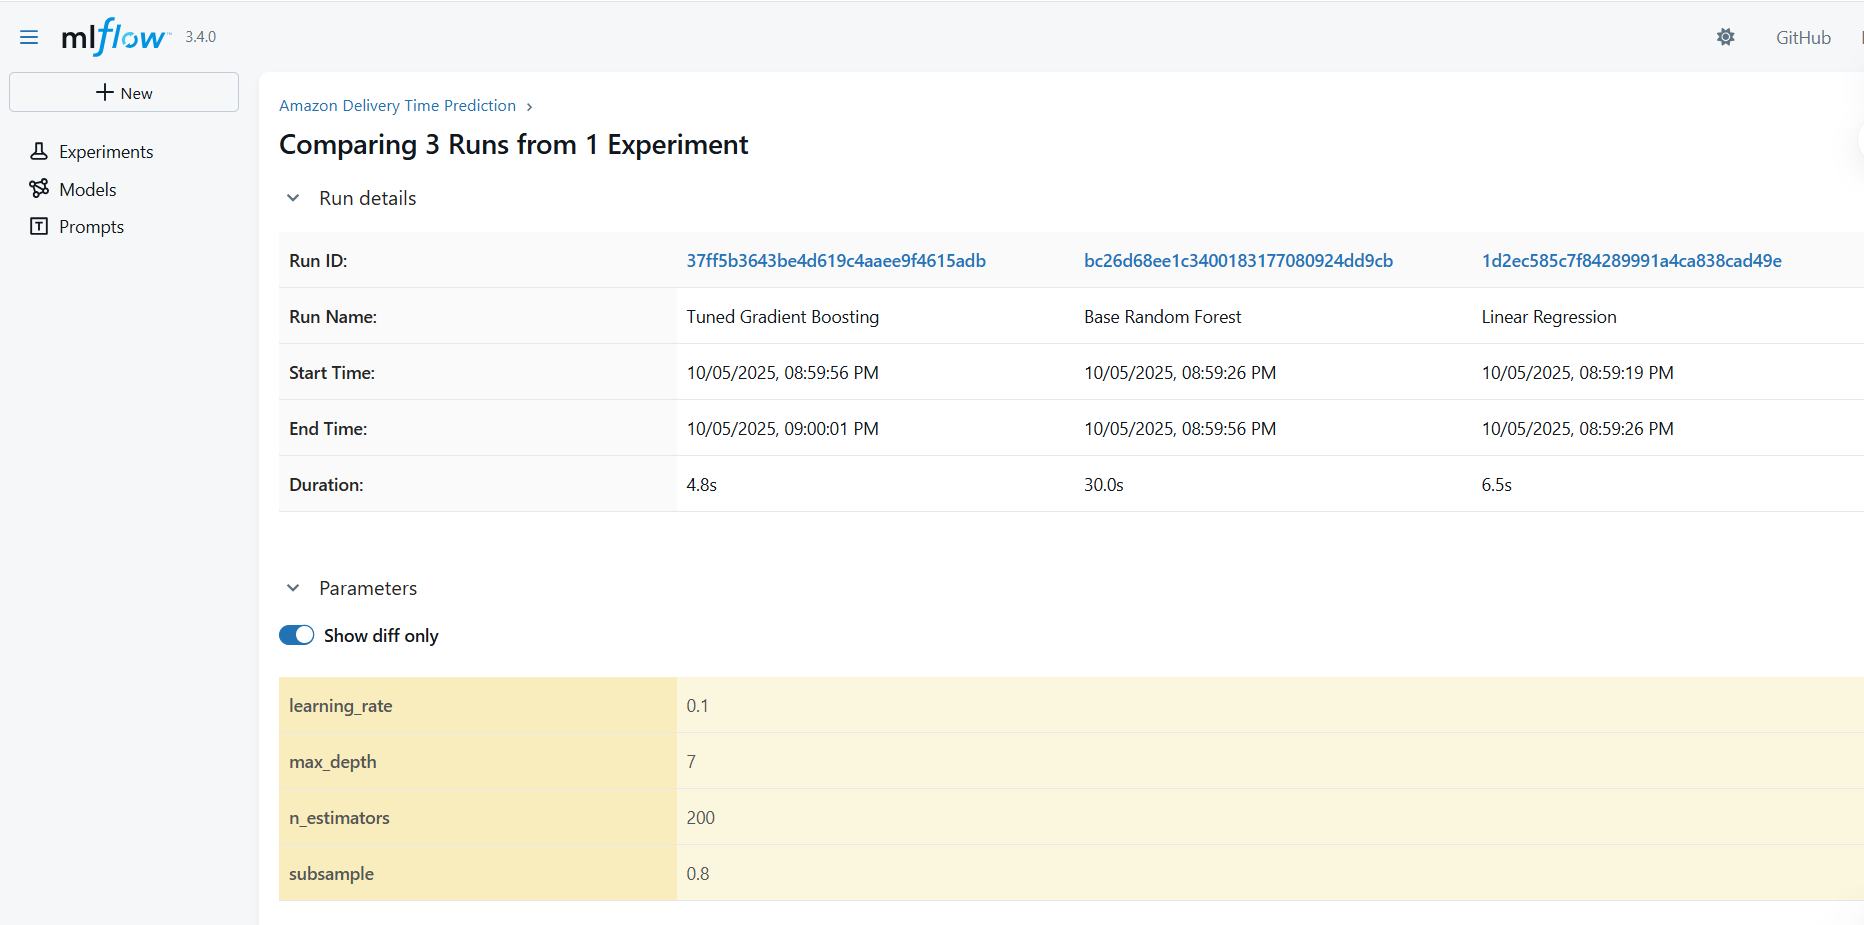

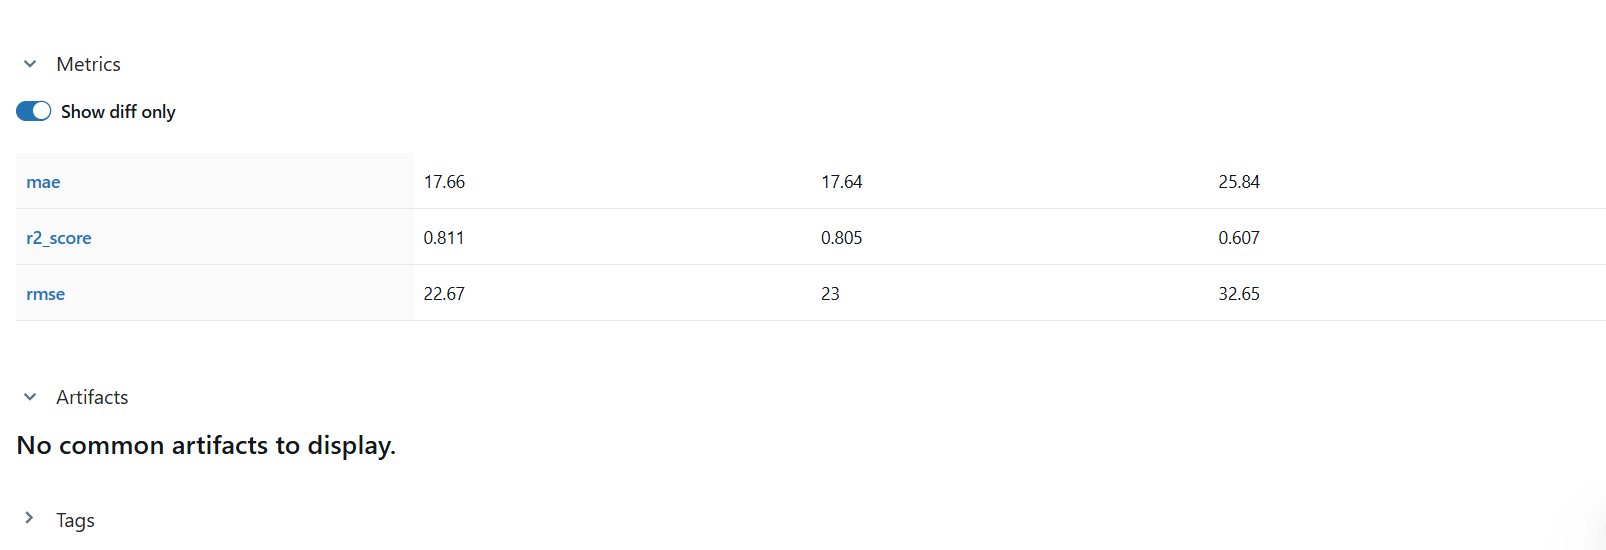

These charts, pulled directly from your MLflow experiment data, confirm our previous findings and are the perfect visuals for a final project summary.

**R-squared Comparison:** The first chart clearly shows that the Tuned Gradient Boosting model has the highest R-squared score, making it the most powerful model in terms of explanatory power. The Base Random Forest is a very close second, while the Linear Regression model is a distant third.

***MAE (Error) Comparison:*** The second chart is crucial for the business context. It shows that the Base Random Forest and Tuned Gradient Boosting models have the lowest Mean Absolute Error, with both being very close. This means their predictions are, on average, the most accurate in terms of minutes.

**Overall Conclusion from MLflow:** The results logged and visualized from MLflow provide strong, reproducible evidence that the Tuned Gradient Boosting Regressor is the best model for this project, offering the best balance of high R-squared and low prediction error.

# **Application development with Streamlit**

In [ ]:
#Step 1: Install Streamlit and ngrok
!pip install streamlit pyngrok -q

1. Save the best performing ml model in a joblib file format for deployment process.


In [ ]:
import joblib
import numpy as np

# 1. Save the best model
joblib.dump(best_gb_model, 'amazon_delivery_time_predictor.joblib')

# 2. Save the scaler object
joblib.dump(scaler, 'scaler.joblib')

# 3. Save the list of all model columns
joblib.dump(X.columns.tolist(), 'model_columns.joblib')

# 4. (NEW STEP) Save the list of ONLY the numerical columns for the scaler
numerical_features_list = X.select_dtypes(include=np.number).columns.tolist()
joblib.dump(numerical_features_list, 'numerical_features.joblib')

print("All necessary files (model, scaler, columns, AND numerical_features) have been saved successfully.")

# Verify the files are there
!ls

**Create the App file**




In [ ]:
# Create the App File

%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib

# --- Load Your Saved Model, Scaler, and Columns ---
try:
    model = joblib.load('amazon_delivery_time_predictor.joblib')
    scaler = joblib.load('scaler.joblib')
    model_columns = joblib.load('model_columns.joblib')
    numerical_features = joblib.load('numerical_features.joblib') # <-- (1) LOAD THE NEW FILE
except FileNotFoundError:
    st.error("Model, scaler, or column files not found. Please ensure all 4 .joblib files are present.")
    st.stop()

# --- App Title and Description ---
st.title("Amazon Delivery Time Predictor")
st.write("Enter the details of the order to get an estimated delivery time.")

# --- Create the Input Form ---
st.header("Order Details")

col1, col2 = st.columns(2)

with col1:
    agent_age = st.slider("Agent Age", 20, 50, 35)
    agent_rating = st.slider("Agent Rating", 1.0, 5.0, 4.8, 0.1)
    distance_km = st.number_input("Distance (km)", min_value=0.1, max_value=100.0, value=15.5, step=0.1)
    pickup_time_minutes = st.number_input("Pickup Time (minutes)", min_value=1, max_value=60, value=10)

with col2:
    order_hour = st.slider("Order Hour (24h)", 0, 23, 14)
    traffic = st.selectbox("Traffic Condition", ['Low', 'Medium', 'High', 'Jam'])
    weather = st.selectbox("Weather Condition", ['Sunny', 'Cloudy', 'Windy', 'Fog', 'Stormy', 'Sandstorms'])
    vehicle = st.selectbox("Vehicle Type", ['motorcycle', 'scooter', 'van'])

# --- Prediction Logic ---
if st.button("Predict Delivery Time"):
    try:
        # 1. Create a DataFrame for prediction
        prediction_df = pd.DataFrame(columns=model_columns)
        prediction_df.loc[0] = 0

        # 2. Update with user inputs
        prediction_df.at[0, 'Agent_Age'] = agent_age
        prediction_df.at[0, 'Agent_Rating'] = agent_rating
        prediction_df.at[0, 'Distance_km'] = distance_km
        prediction_df.at[0, 'pickup_time_minutes'] = pickup_time_minutes
        prediction_df.at[0, 'order_hour'] = order_hour

        # Handle one-hot encoded features by checking if the column exists
        traffic_col = f'Traffic_{traffic}'
        if traffic_col in model_columns:
            prediction_df.at[0, traffic_col] = 1

        weather_col = f'Weather_{weather}'
        if weather_col in model_columns:
            prediction_df.at[0, weather_col] = 1

        vehicle_col = f'Vehicle_{vehicle}'
        if vehicle_col in model_columns:
            prediction_df.at[0, vehicle_col] = 1

        # 3. Apply scaling using the loaded numerical features list
        prediction_df[numerical_features] = scaler.transform(prediction_df[numerical_features]) # <-- (2) USE THE LOADED LIST

        # 4. Make prediction
        predicted_time = model.predict(prediction_df)

        # 5. Display result
        st.success(f"**Estimated Delivery Time: {predicted_time[0]:.0f} minutes**")

    except Exception as e:
        st.error(f"An error occurred during prediction: {e}")

**Model Deployment**

In [ ]:
#Step 3: Launch the App
from pyngrok import ngrok

# Terminate open tunnels if any
ngrok.kill()

# Set up the authtoken (get it from your ngrok dashboard)
# Replace YOUR_AUTHTOKEN_HERE with your actual token
authtoken = "33eXnQaqWVPBwNq1VUnYsj2mh5n_Dd9Gk2GjKb6wNTKbrNMu"
ngrok.set_auth_token(authtoken)

# Run streamlit in background
!nohup streamlit run app.py &

# Create a public URL to the app
public_url = ngrok.connect(8501)
print(f"Click this link to view your Streamlit app: {public_url}")

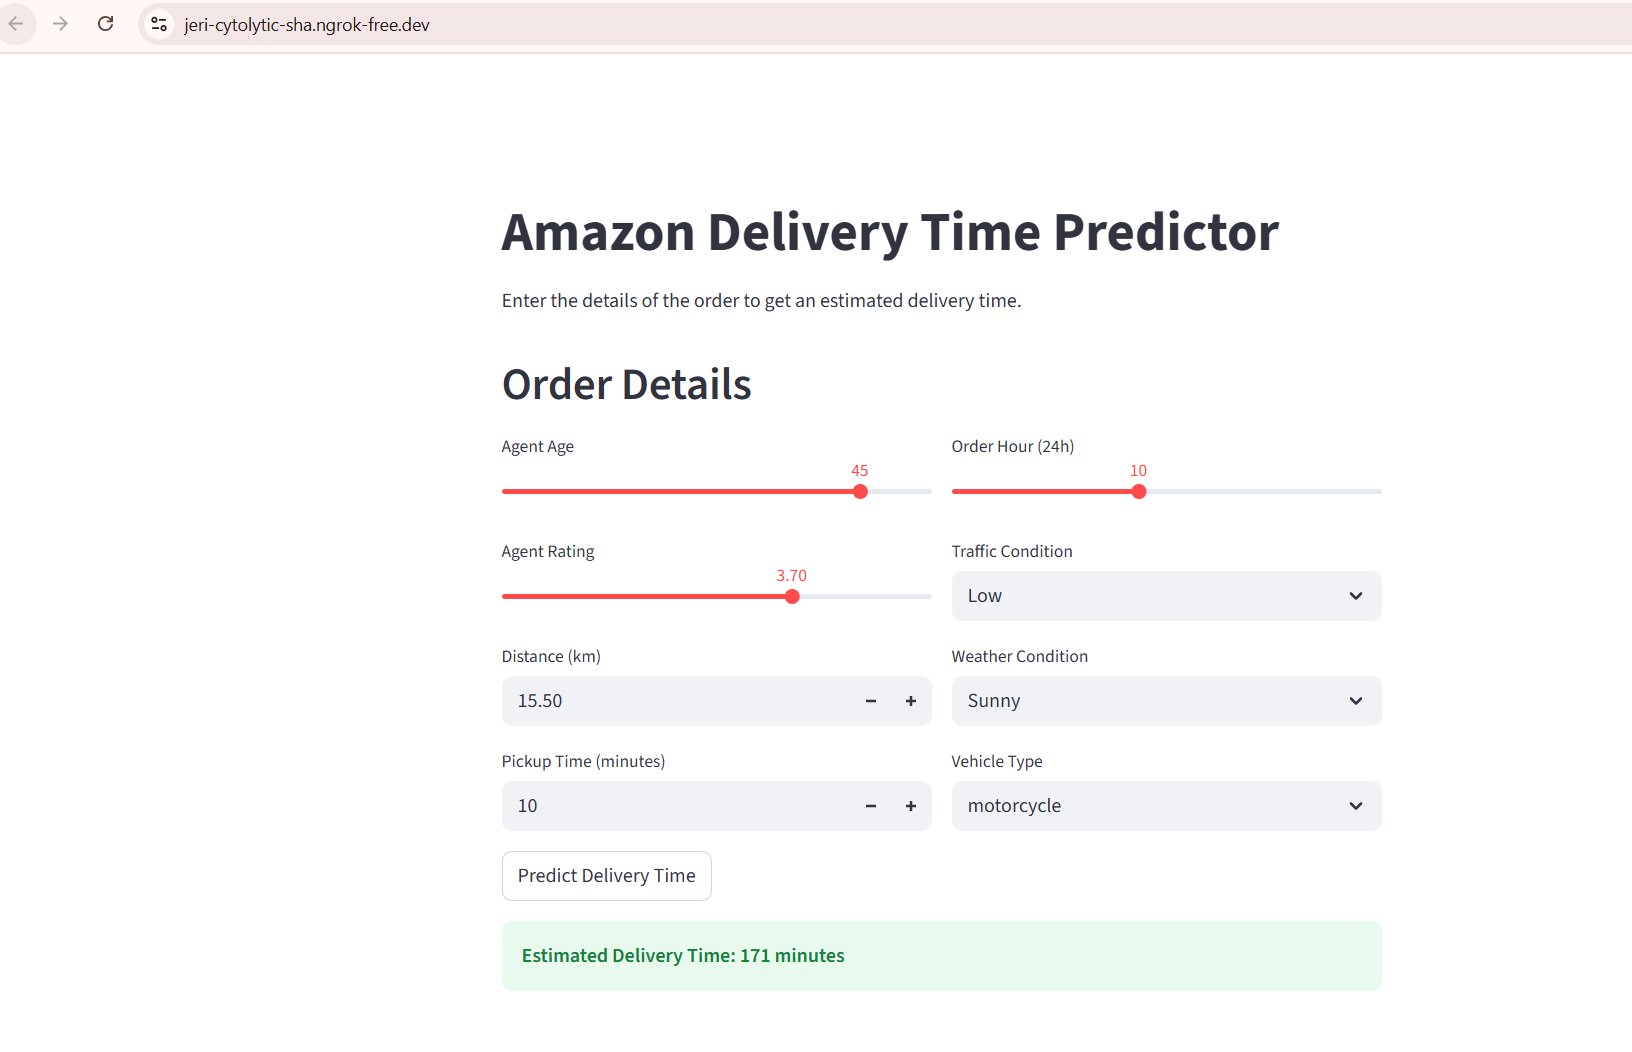

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

## **Summary and Conclusion**

**objective.**

"This project aimed to develop a machine learning model to accurately predict e-commerce delivery times by analyzing various features like agent performance, traffic, weather, and order distance.

**key steps and Findings:**

"Through comprehensive Exploratory Data Analysis (EDA), we uncovered key relationships, such as the significant impact of traffic jams and adverse weather on delivery times. The data was rigorously cleaned, and new features like haversine distance and pickup duration were engineered to enhance model performance."

**Best Model:**

"After comparing three models—**Linear Regression, Random Forest, and Gradient Boosting**—the **Tuned Gradient Boosting Regressor** was selected as the final model. It demonstrated the highest performance, proving its superior ability to capture the complex patterns in the data."

**Best ModelPerformance:**

"The final model achieved an R-squared score of 81.1%, meaning it can explain over 81% of the variability in delivery times. It has a Mean Absolute Error (MAE) of approximately 17.7 minutes, indicating a high level of accuracy in its predictions."

**Key Business Insights:**

"The model revealed that the most critical predictors of delivery time are whether the order is for Groceries, the travel distance, and the initial pickup time. These insights suggest that business optimizations should focus on the unique logistics of grocery delivery and minimizing order preparation times."

 **Final Conclusion:**

"Ultimately, this project produced not only an accurate predictive model but also a functional Streamlit application. This tool serves as a valuable asset for setting accurate customer expectations, optimizing logistical planning, and improving overall service reliability, leading to increased customer satisfaction and a stronger competitive edge."


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***